<a href="https://colab.research.google.com/github/Buy-me-some-str/practice/blob/main/Py_torch_02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### Классификация Pytorch

In [2]:
#1.import data
from sklearn.datasets import make_circles

In [3]:
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
print("X:",X[:5], "y:",y[:5])

X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] y: [1 1 1 1 0]


In [5]:
circles = pd.DataFrame({"X1":X[:, 0], 
                        "X2":X[:, 1],
                        "label": y})

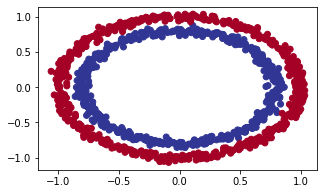

In [6]:
plt.figure(figsize=(5, 3))
plt.scatter(x=circles.X1,
            y=circles.X2,
            c=circles.label,
            cmap=plt.cm.RdYlBu)

In [7]:
#1.1 размерности
X.shape, y.shape
X.dtype

dtype('float64')

In [8]:
#1.2 тензоры
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
#1.3 разбиение
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 42)

In [10]:
len(X_train), len(y_test)

(800, 200)

In [11]:
#2 построение модели
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [12]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=5)
        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=25)
        self.layer_3 = nn.Linear(in_features=25,
                                 out_features=50)
        self.layer_4 = nn.Linear(in_features=50,
                                 out_features=1)
    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        x = self.layer_4(x)
        return x

In [13]:
model_0 = CircleModelV0()
model_0 = model_0.to(device)

In [14]:
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[-0.2869,  0.3656],
                      [-0.0611, -0.6477],
                      [-0.2572,  0.4301],
                      [ 0.6838,  0.4913],
                      [ 0.1719,  0.2058]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.0369,  0.6074, -0.6529, -0.1500, -0.1155], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-2.2472e-01,  1.2860e-02, -2.0607e-03, -2.2099e-01, -2.5756e-01],
                      [ 2.9092e-01,  3.4685e-01, -3.8743e-01,  9.2670e-02,  3.1873e-01],
                      [ 3.7451e-01, -4.0776e-01,  4.7642e-02, -2.2128e-01, -2.2247e-02],
                      [ 6.2162e-02, -1.1872e-01, -2.9982e-01, -1.0728e-01,  3.7772e-01],
                      [-2.2474e-01, -3.8466e-01, -3.5338e-01,  1.3054e-01, -5.5332e-02],
                      [-1.7038e-01, -1.6486e-01, -3.0831e-01, -2.2263e-01,  2.6065e-01],
                      [ 2.6044e-01, -4.3695e-01,  2.0938e-01,  1.4137

In [15]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    print(untrained_preds[:5].squeeze(dim=1), y_test[:5])

tensor([-0.0043, -0.0432,  0.0722, -0.0258,  0.0317], device='cuda:0') tensor([1., 0., 1., 0., 1.])


In [16]:
#2.1 функция потерь (с автоматической сигмоидной активацией)
loss_fn = torch.nn.BCEWithLogitsLoss()
##nn.BCEWithLogitLoss() = nn.Sequential(
##      nn.Sigmoid(),
##      nn.BCELoss()
##)
#2.2 оптимизатор (SGD, Adam)
optim = torch.optim.Adam(params=model_0.parameters(),
                         lr=0.01)
#оптимизатор оптимизирует параметры из model_0.parameters()
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[-0.2869,  0.3656],
                      [-0.0611, -0.6477],
                      [-0.2572,  0.4301],
                      [ 0.6838,  0.4913],
                      [ 0.1719,  0.2058]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.0369,  0.6074, -0.6529, -0.1500, -0.1155], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-2.2472e-01,  1.2860e-02, -2.0607e-03, -2.2099e-01, -2.5756e-01],
                      [ 2.9092e-01,  3.4685e-01, -3.8743e-01,  9.2670e-02,  3.1873e-01],
                      [ 3.7451e-01, -4.0776e-01,  4.7642e-02, -2.2128e-01, -2.2247e-02],
                      [ 6.2162e-02, -1.1872e-01, -2.9982e-01, -1.0728e-01,  3.7772e-01],
                      [-2.2474e-01, -3.8466e-01, -3.5338e-01,  1.3054e-01, -5.5332e-02],
                      [-1.7038e-01, -1.6486e-01, -3.0831e-01, -2.2263e-01,  2.6065e-01],
                      [ 2.6044e-01, -4.3695e-01,  2.0938e-01,  1.4137

In [17]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    #item() - из тензора делает число
    accuracy = (correct/len(y_pred))*100
    return accuracy
untrained_preds_probs = torch.sigmoid(untrained_preds.cpu())
accuracy_fn(y_train.cpu(), torch.round(untrained_preds_probs.cpu()))

40000.0

In [18]:
#logits_>pred_prob->label

In [19]:
#3.Тренировочный цикл
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
loss_value = []
test_loss_value = []
count_epochs = []

In [20]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [21]:
for epoch in range(epochs):
    model_0.train()
    y_logits = model_0.forward(X_train).squeeze() #-1 измерение
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_true=y_train,
                           y_pred=y_pred)
    optim.zero_grad()
    loss.backward()
    optim.step()
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,
                            y_test)
        test_accuracy = accuracy_fn(y_true=y_test,
                                  y_pred=test_pred)
    if epoch%10==0:
        count_epochs.append(epoch)
        loss_value.append(accuracy)
        test_loss_value.append(test_accuracy)

In [22]:
with torch.inference_mode():
    test_pred_logits = model_0.forward(X_test).squeeze()

In [23]:
#4 сделаем прогнозы и визуализируем
test_pred_probs = torch.sigmoid(test_pred_logits)
test_pred = torch.round(test_pred_probs)
X_test = X_test.to('cpu')
test_pred = test_pred.to('cpu')

In [24]:
X_test.device, test_pred.device

(device(type='cpu'), device(type='cpu'))

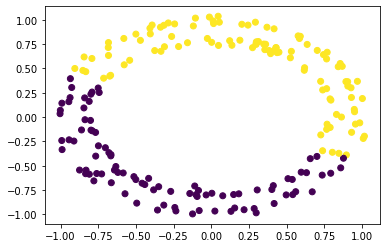

In [25]:
plt.scatter(X_test[:,0], 
            X_test[:,1], 
            c = test_pred)

In [26]:
accuracy_fn(y_true=y_test.cpu(),
            y_pred=test_pred.cpu())

46.0

In [27]:
loss_fn(test_pred.cpu(), y_test.cpu())

tensor(0.7780)

In [28]:
import requests
from pathlib import Path

#скачаем вспомогательные функции
if Path("helper_functions.py").is_file():
    print("helper_functions.py is alreary exists, skipping download")
else:
    print("download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py is alreary exists, skipping download


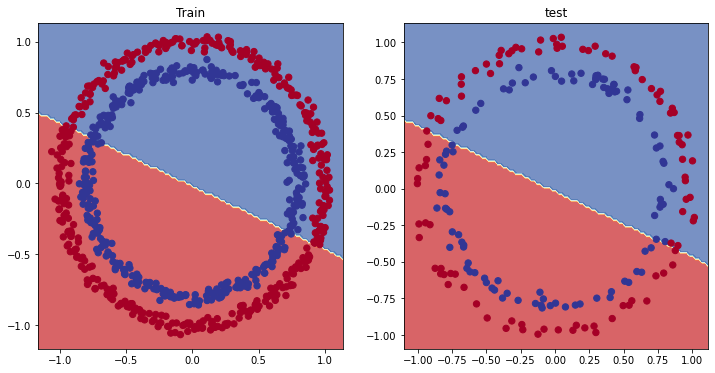

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

In [30]:
### 5 улучшим модель
# 5.1 - добавим слои
# 5.2 - добавим больше скрытых слоёв
# 5.3 - изменим функцию активацию
# 5.4 - изменим скорость обучения
# 5.5 - ну еще над функцией потерь можно подумать



In [31]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=10)
        self.layer_2 = nn.Linear(in_features=10,
                                 out_features=10)
        self.layer_3 = nn.Linear(in_features=10,
                                 out_features=1)
    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return x
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(params=model_1.parameters(),
                         lr =0.0001)

In [33]:
epochs = 1000
loss_value = []
test_loss_value = []
count_epochs = []

In [34]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [36]:
for epoch in range(epochs):
    model_1.train() #переводим модель в режим обучения
    y_pred_logits = model_1.forward(X_train).squeeze() #проталкиваем обучающую выборку
    y_pred = torch.round(torch.sigmoid(y_pred_logits))
    optim.zero_grad() #обнуляем градиенты
    loss = loss_fn(y_pred_logits, y_train) #считаем лосс-функцию
    accuracy = accuracy_fn(y_true=y_train,
                           y_pred=y_pred)
    loss.backward() #обратное распространение
    optim.step() #делаем шаг к минимуму
    model_1.eval()
    if epoch%10==0:
        count_epochs.append(epoch)
        with torch.inference_mode():
            y_pred_test_logits = model_1.forward(X_test).squeeze()
            y_pred_test_probs = torch.sigmoid(y_pred_test_logits)
            y_pred_test = torch.round(y_pred_test_probs)
            loss_value.append(loss)
            test_loss = loss_fn(y_pred_test_logits, y_test)
            test_accuracy = accuracy_fn(y_true=y_test,
                                        y_pred=y_pred_test)
            test_loss_value.append(test_loss)
            if epoch%100==0:
                print(f"Epoch:{epoch} | Loss: {loss:5f}, Accuracy: {accuracy:.2f}% | Test loss: {test_loss:5f}, Test accuracy: {test_accuracy:.2f}%")

Epoch:0 | Loss: 0.693955, Accuracy: 50.88% | Test loss: 0.692610, Test accuracy: 51.00%
Epoch:100 | Loss: 0.693952, Accuracy: 50.88% | Test loss: 0.692611, Test accuracy: 51.00%
Epoch:200 | Loss: 0.693948, Accuracy: 50.75% | Test loss: 0.692611, Test accuracy: 51.00%
Epoch:300 | Loss: 0.693945, Accuracy: 50.75% | Test loss: 0.692612, Test accuracy: 51.00%
Epoch:400 | Loss: 0.693942, Accuracy: 50.75% | Test loss: 0.692612, Test accuracy: 51.00%
Epoch:500 | Loss: 0.693938, Accuracy: 50.75% | Test loss: 0.692612, Test accuracy: 51.00%
Epoch:600 | Loss: 0.693935, Accuracy: 50.75% | Test loss: 0.692613, Test accuracy: 51.00%
Epoch:700 | Loss: 0.693932, Accuracy: 50.75% | Test loss: 0.692613, Test accuracy: 51.00%
Epoch:800 | Loss: 0.693929, Accuracy: 50.62% | Test loss: 0.692614, Test accuracy: 51.00%
Epoch:900 | Loss: 0.693925, Accuracy: 50.62% | Test loss: 0.692614, Test accuracy: 51.00%


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

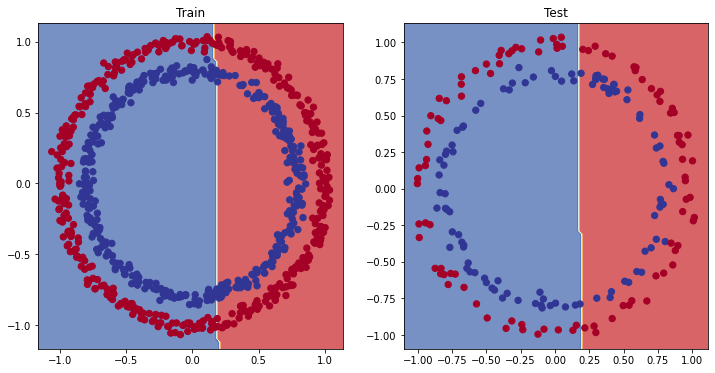

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
model_1.to(device)

In [38]:
# Проверим нашу модель на других данных
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight*X_regression+bias

In [39]:
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

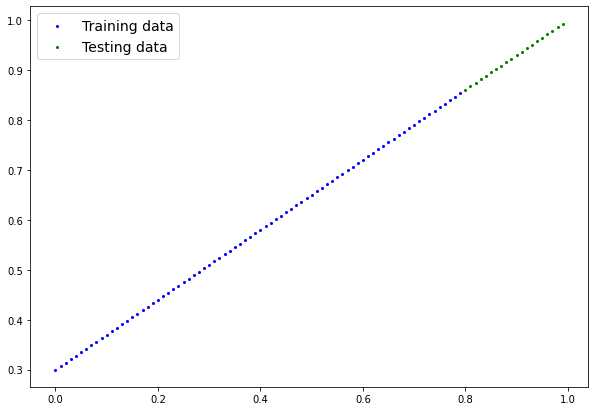

In [40]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)


In [41]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000
X_train_regression = X_train_regression.to(device)
y_train_regression = y_train_regression.to(device)
X_test_regression = X_test_regression.to(device)
y_test_regression = y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2.forward(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2.forward(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    if epoch%100==0:
        print(f"Epoch: {epoch} | Loss: {loss: .5f} | Test loss: {test_loss: .5f}")

Epoch: 0 | Loss:  0.75986 | Test loss:  0.91103
Epoch: 100 | Loss:  0.02858 | Test loss:  0.00081
Epoch: 200 | Loss:  0.02533 | Test loss:  0.00209
Epoch: 300 | Loss:  0.02137 | Test loss:  0.00305
Epoch: 400 | Loss:  0.01964 | Test loss:  0.00341
Epoch: 500 | Loss:  0.01940 | Test loss:  0.00387
Epoch: 600 | Loss:  0.01903 | Test loss:  0.00379
Epoch: 700 | Loss:  0.01878 | Test loss:  0.00381
Epoch: 800 | Loss:  0.01840 | Test loss:  0.00329
Epoch: 900 | Loss:  0.01798 | Test loss:  0.00360


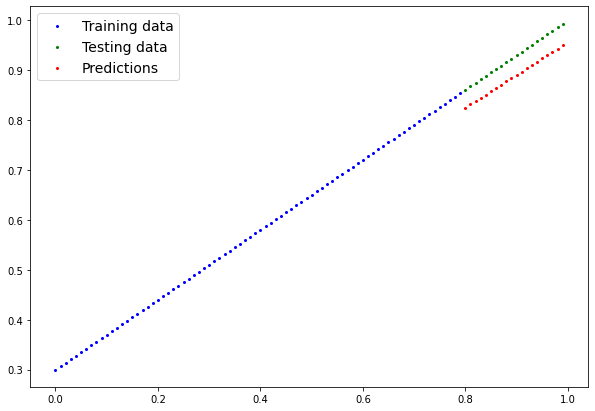

In [44]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

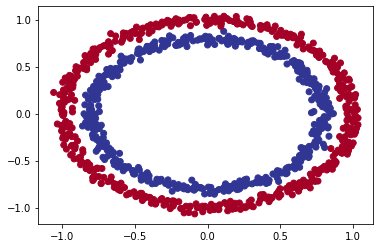

In [45]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [46]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [48]:
### Построение модели с нелинейностью


In [49]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() #нелинейная функция активации
    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.layer_3(x)
        return x

In [50]:
model_3 = CircleModelV2().to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [51]:
epochs = 2000
loss_value = []
test_loss_value = []
torch.manual_seed(42)
torch.cuda.manual_seed(42)



X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [52]:
for epoch in range(epochs):
    model_3.train()

    y_logits = model_3.forward(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    if epoch%100==0:
        print(f"Epoch:{epoch}|Loss:{loss:.4f}, Acc:{acc:.2f}%|Test loss:{test_loss:.4f}, Test acc:{test_acc:.2f}%")

Epoch:0|Loss:0.6929, Acc:50.00%|Test loss:0.6932, Test acc:50.00%
Epoch:100|Loss:0.6912, Acc:52.88%|Test loss:0.6910, Test acc:52.50%
Epoch:200|Loss:0.6898, Acc:53.37%|Test loss:0.6894, Test acc:55.00%
Epoch:300|Loss:0.6879, Acc:53.00%|Test loss:0.6872, Test acc:56.00%
Epoch:400|Loss:0.6852, Acc:52.75%|Test loss:0.6841, Test acc:56.50%
Epoch:500|Loss:0.6810, Acc:52.75%|Test loss:0.6794, Test acc:56.50%
Epoch:600|Loss:0.6751, Acc:54.50%|Test loss:0.6729, Test acc:56.00%
Epoch:700|Loss:0.6666, Acc:58.38%|Test loss:0.6632, Test acc:59.00%
Epoch:800|Loss:0.6516, Acc:64.00%|Test loss:0.6476, Test acc:67.50%
Epoch:900|Loss:0.6236, Acc:74.00%|Test loss:0.6215, Test acc:79.00%
Epoch:1000|Loss:0.5682, Acc:87.75%|Test loss:0.5738, Test acc:86.50%
Epoch:1100|Loss:0.4815, Acc:93.50%|Test loss:0.4993, Test acc:90.50%
Epoch:1200|Loss:0.3706, Acc:97.75%|Test loss:0.4059, Test acc:92.00%
Epoch:1300|Loss:0.2546, Acc:99.00%|Test loss:0.3033, Test acc:96.50%
Epoch:1400|Loss:0.1718, Acc:99.50%|Test loss:0

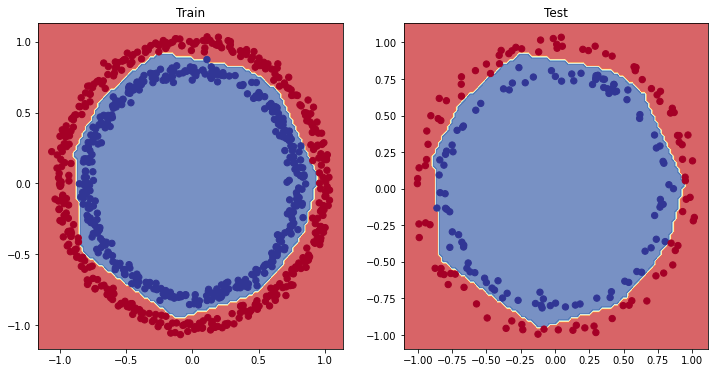

In [53]:
model_3.eval()
with torch.inference_mode():
    #y_preds = torch.round(torch.sigmoid(model_3.forward(X_test))).squeeze()
    plt.figure(figsize = (12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model=model_3,
                           X=X_train,
                           y=y_train)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model=model_3,
                           X=X_test,
                           y=y_test)

In [54]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

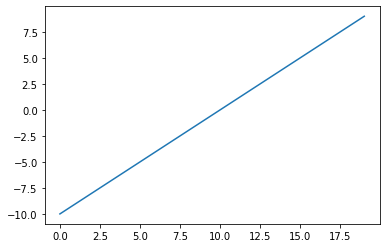

In [55]:
plt.plot(A)

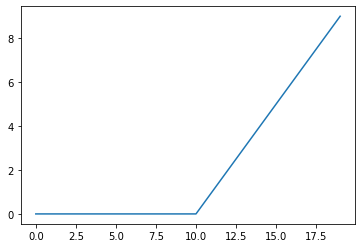

In [56]:
plt.plot(torch.relu(A))

In [57]:
def relu(x:torch.Tensor)->torch.Tensor:
    return torch.maximum(torch.tensor(0), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

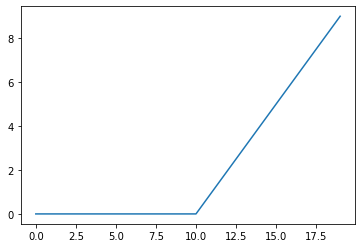

In [58]:
plt.plot(relu(A))

In [59]:
def sigmoid(x:torch.Tensor)->torch.Tensor:
    return 1/(1+torch.exp(-x))

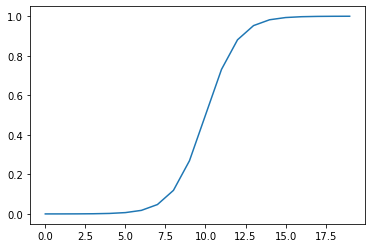

In [60]:
plt.plot(torch.sigmoid(A))

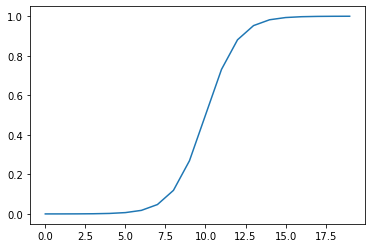

In [61]:
plt.plot(sigmoid(A))

In [62]:
### 8 обЪеденим всё в многоклассовую классификацию

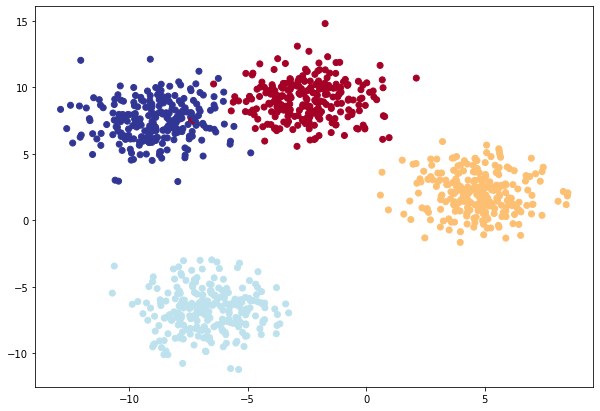

In [63]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#гиперпараметры
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [64]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [65]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features = hidden_units),
            #nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features = hidden_units),
            #nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features = output_features)

        )
    def forward(self, x):
        return self.linear_layer_stack(x)

In [66]:
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

In [67]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                             lr=0.1)

In [68]:
X_blob_train = X_blob_train.to(device)
y_blob_train = y_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_test = y_blob_test.to(device)

In [69]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4.forward(X_blob_train).squeeze()
y_logits[:10]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804],
        [-0.5073, -1.2865, -0.7239,  0.3814],
        [ 0.6031, -1.6200,  0.4522,  1.5135],
        [-0.9233, -0.5593, -1.0775, -0.4963],
        [ 1.7228, -1.0307,  1.7717,  1.9579],
        [ 0.5619, -1.4183,  0.4359,  1.3289]], device='cuda:0')

In [70]:
y_blob[:10]
#logits->probs->predictions

tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1])

In [71]:
y_pred_probs = torch.softmax(y_logits, dim=1)

In [72]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 2, 3, 3, 3, 3, 3, 3], device='cuda:0')

In [73]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2000

for epoch in range(epochs):
    model_4.train()
    y_logits = model_4.forward(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred = y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4.forward(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                               y_pred=test_preds)
        if epoch %100==0:
            print(f"Epoch:{epoch}|Loss:{loss:.4f}, Acc:{acc:.2f}%|Test loss:{test_loss:.4f}|Test acc:{test_acc:.2f}%")

Epoch:0|Loss:1.0432, Acc:65.50%|Test loss:0.5786|Test acc:95.50%
Epoch:100|Loss:0.0318, Acc:99.12%|Test loss:0.0229|Test acc:99.50%
Epoch:200|Loss:0.0271, Acc:99.12%|Test loss:0.0170|Test acc:99.50%
Epoch:300|Loss:0.0256, Acc:99.25%|Test loss:0.0150|Test acc:99.50%
Epoch:400|Loss:0.0249, Acc:99.25%|Test loss:0.0139|Test acc:99.50%
Epoch:500|Loss:0.0244, Acc:99.25%|Test loss:0.0132|Test acc:99.50%
Epoch:600|Loss:0.0241, Acc:99.25%|Test loss:0.0127|Test acc:99.50%
Epoch:700|Loss:0.0238, Acc:99.25%|Test loss:0.0122|Test acc:99.50%
Epoch:800|Loss:0.0235, Acc:99.25%|Test loss:0.0119|Test acc:99.50%
Epoch:900|Loss:0.0232, Acc:99.25%|Test loss:0.0116|Test acc:99.50%
Epoch:1000|Loss:0.0230, Acc:99.38%|Test loss:0.0113|Test acc:99.50%
Epoch:1100|Loss:0.0228, Acc:99.38%|Test loss:0.0111|Test acc:99.50%
Epoch:1200|Loss:0.0226, Acc:99.38%|Test loss:0.0109|Test acc:99.50%
Epoch:1300|Loss:0.0224, Acc:99.38%|Test loss:0.0107|Test acc:99.50%
Epoch:1400|Loss:0.0222, Acc:99.38%|Test loss:0.0105|Test acc

In [74]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)

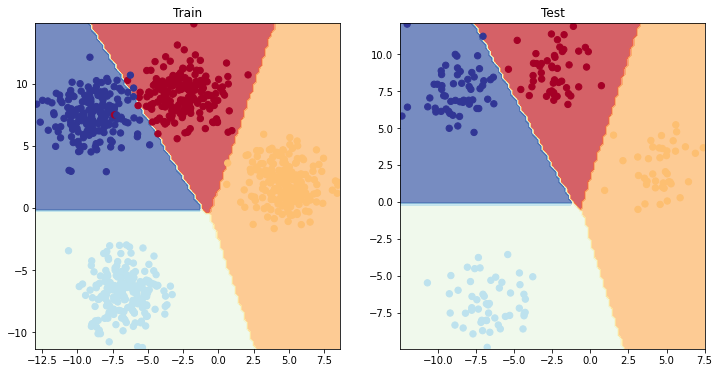

In [75]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [76]:
### метрики классификации
# accuracy
# precision
# recall
# F1-score
# confusion matrix
# classification report

In [77]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from torchmetrics import Accuracy

In [81]:
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')